About this Notebook
In this notebook, we learn how to use scikit-learn to implement simple linear regression. We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, evaluate your model using test set, and finally use model to predict unknown value.

# Importing Needed packages

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

## Reading the data in

In [19]:
df = pd.read_csv("FuelConsumptionCo2.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Data Exploration
Lets first have a descriptive exploration on our data.

In [20]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [21]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


In [22]:
cdf.isnull().sum()

ENGINESIZE              0
CYLINDERS               0
FUELCONSUMPTION_COMB    0
CO2EMISSIONS            0
dtype: int64

In [23]:
# no value is missing here 
# now we will plot this using a histogram

[]

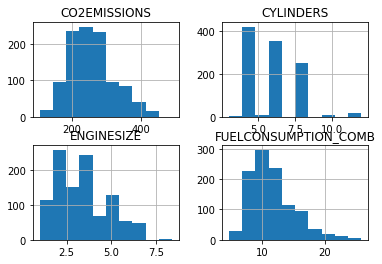

In [24]:
viz = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.plot()

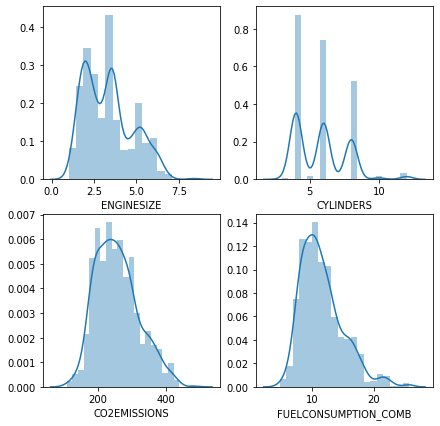

In [40]:
# usinng seaborn 
import seaborn as sns

# normal distplot 
f,axis=plt.subplots(2,2,figsize=(7,7),sharex=False)
#if we want the plots to share any axis we use sharex or sharey so axis are same for different graphs
sns.distplot(cdf['ENGINESIZE'],ax = axis[0,0])
sns.distplot(cdf['CYLINDERS'],bins=20,ax=axis[0,1])
sns.distplot(cdf['CO2EMISSIONS'],ax = axis[1,0])
sns.distplot(cdf['FUELCONSUMPTION_COMB'],bins=20,ax=axis[1,1])

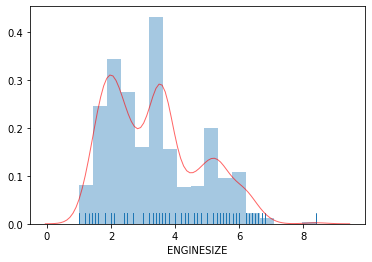

In [54]:
#kde specifies the line that is drawn and rug tells the point of conclusion
sns.distplot(cdf['ENGINESIZE'],kde=True,rug=True,
            kde_kws={"color":"r","alpha":0.6,"linewidth":1})

In [56]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [67]:
train_X,test_X,train_Y,test_Y = train_test_split(cdf[['ENGINESIZE']],cdf[['CO2EMISSIONS']],test_size=0.2)

In [68]:
lm = linear_model.LinearRegression()

lm.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
predict = lm.predict(test_X)


In [70]:
print(predict)

[[222.56943736]
 [222.56943736]
 [348.30285713]
 [187.20691305]
 [202.92359052]
 [332.58617966]
 [242.2152842 ]
 [265.7903004 ]
 [179.34857431]
 [218.64026799]
 [320.79867155]
 [202.92359052]
 [218.64026799]
 [265.7903004 ]
 [265.7903004 ]
 [202.92359052]
 [187.20691305]
 [250.07362293]
 [187.20691305]
 [218.64026799]
 [261.86113104]
 [257.93196167]
 [230.42777609]
 [202.92359052]
 [202.92359052]
 [202.92359052]
 [242.2152842 ]
 [202.92359052]
 [187.20691305]
 [257.93196167]
 [202.92359052]
 [265.7903004 ]
 [320.79867155]
 [218.64026799]
 [242.2152842 ]
 [261.86113104]
 [309.01116345]
 [202.92359052]
 [179.34857431]
 [336.51534902]
 [293.29448598]
 [187.20691305]
 [320.79867155]
 [297.22365535]
 [261.86113104]
 [269.71946977]
 [195.06525178]
 [332.58617966]
 [261.86113104]
 [183.27774368]
 [183.27774368]
 [367.94870397]
 [265.7903004 ]
 [273.64863914]
 [187.20691305]
 [265.7903004 ]
 [265.7903004 ]
 [187.20691305]
 [269.71946977]
 [281.50697787]
 [242.2152842 ]
 [187.20691305]
 [187.20

In [71]:
from sklearn.metrics import r2_score

print(r2_score(predict,test_Y))

0.7026804750340119


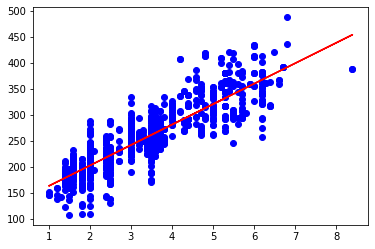

In [76]:
plt.scatter(cdf[['ENGINESIZE']],cdf[['CO2EMISSIONS']],color="blue")
plt.plot(train_X,lm.coef_*train_X+lm.intercept_,color="r")